In [1]:
from pyiron_workflow_atomistics.bulk import eos_volume_scan, get_equil_lat_param, get_bulk_structure
from pyiron_workflow import Workflow

from tensorpotential.calculator import TPCalculator

from ase.build import bulk
%load_ext autoreload
%autoreload 2

2025-05-03 19:37:51.302278: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-03 19:37:51.305972: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 19:37:51.310504: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 19:37:51.325024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-03 19:37:51.351834: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
# 1. Prepare calculator and workflow
calc = TPCalculator("/cmmc/u/hmai/FePotentials/potential_files/GRACE/2025_04_28_Fe_FeC_C_pyxtal/final_model/")
wf   = Workflow("EOS")

# 2. Build your base Fe structure
bulk_Fe = bulk("Fe", cubic=True, a=2.83)
bulk_Fe.rattle()

# 3. Attach the macro node to the workflow, capturing all outputs
wf.eos = eos_volume_scan(
    base_structure = bulk_Fe,
    calc           = calc,
    calc_kwargs = {"fmax": 0.01, "max_steps": 10000, "properties": ("energy", "forces", "stresses", "volume")},
    axes           = ["x", "y", "z"],
    strain_range   = (-0.02, 0.02),
    num_points     = 11,
)
wf.a0 = get_equil_lat_param(wf.eos.outputs.v0)
wf.eq_bulk_struct = get_bulk_structure(name = "Fe",
                           cubic = True,
                           a = wf.a0)
wf.run()

I0000 00:00:1746293899.913979   39615 service.cc:145] XLA service 0x560ca20487a0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746293899.914022   39615 service.cc:153]   StreamExecutor device (0): Host, Default Version
2025-05-03 19:38:20.112979: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


      Step     Time          Energy          fmax
BFGS:    0 19:38:23      -16.426848        0.013886
BFGS:    1 19:38:23      -16.426853        0.009742
      Step     Time          Energy          fmax
BFGS:    0 19:38:23      -16.445536        0.013684
BFGS:    1 19:38:23      -16.445541        0.009676
      Step     Time          Energy          fmax
BFGS:    0 19:38:23      -16.459238        0.013455
BFGS:    1 19:38:23      -16.459243        0.009596
      Step     Time          Energy          fmax
BFGS:    0 19:38:23      -16.468379        0.013201


I0000 00:00:1746293903.050948   39615 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


BFGS:    1 19:38:23      -16.468384        0.009501
      Step     Time          Energy          fmax
BFGS:    0 19:38:23      -16.473365        0.012925
BFGS:    1 19:38:23      -16.473369        0.009392
      Step     Time          Energy          fmax
BFGS:    0 19:38:23      -16.474567        0.012627
BFGS:    1 19:38:23      -16.474571        0.009269
      Step     Time          Energy          fmax
BFGS:    0 19:38:23      -16.472316        0.012309
BFGS:    1 19:38:23      -16.472319        0.009131
      Step     Time          Energy          fmax
BFGS:    0 19:38:23      -16.466897        0.011973
BFGS:    1 19:38:23      -16.466901        0.008978
      Step     Time          Energy          fmax
BFGS:    0 19:38:23      -16.458553        0.011620
BFGS:    1 19:38:23      -16.458557        0.008810
      Step     Time          Energy          fmax
BFGS:    0 19:38:23      -16.447485        0.011252
BFGS:    1 19:38:23      -16.447488        0.008627
      Step     Time     

{'eos__e0': -16.474689854766503,
 'eos__B': 1.0888794134964814,
 'eos__volumes': [21.332292682904004,
  21.594572051010047,
  21.858992463340865,
  22.12556262332826,
  22.39429123440404,
  22.665187000000007,
  22.938258623547974,
  23.21351480847975,
  23.490964258227127,
  23.770615676221958,
  24.052477765896],
 'eos__energies': [-16.426852917139826,
  -16.445540896964737,
  -16.45924258740174,
  -16.468383524321588,
  -16.473368947210723,
  -16.474570704126037,
  -16.472319307811315,
  -16.46690065609176,
  -16.458556567783948,
  -16.447488114746896,
  -16.43386071411896],
 'eq_bulk_struct__equil_struct': Atoms(symbols='Fe2', pbc=True, cell=[2.8281575503078877, 2.8281575503078877, 2.8281575503078877], initial_magmoms=...)}

In [3]:
wf.a0.outputs.a0.value

2.8281575503078877

In [4]:
import pandas as pd
df_gbcode = pd.read_pickle("/cmmc/u/hmai/2024_08_19_FePureGBs_Motifs/ACE_DFT_GBPropComparison/GB_code_Sigma100_RA_110_111_001.pkl.gz")
df_gbcode

,Axis,Sigma,m,n,GB1,GB2,Theta (deg),Type,n_atoms,a,b,c,a_calc
0,"[1, 1, 0]",3,2,1,"(-4, -1, -3)","(-5, 0, 1)",70.528779,Mixed,1872,28.880847,8.496000,43.321270,57.761693
1,"[1, 1, 0]",3,2,1,"(4, -1, 1)","(3, 0, -3)",70.528779,Mixed,144,24.030317,4.005053,8.496000,48.060634
2,"[1, 1, 0]",3,2,1,"(0, 4, 1)","(2, 2, 3)",70.528779,Mixed,1224,23.353270,8.496000,35.029905,46.706541
3,"[1, 1, 0]",3,2,1,"(0, 0, -3)","(-2, 2, -1)",70.528779,Tilt,144,16.992000,4.005053,12.015158,33.984000
4,"[1, 1, 0]",3,2,1,"(3, -2, 1)","(2, -1, -3)",70.528779,Mixed,336,21.192747,6.936955,12.977854,42.385495
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,"[0, 0, 1]",89,13,3,"(-18, 11, 0)","(-21, 2, 0)",25.989234,Tilt,1780,119.482211,2.832000,59.741105,NaN
89,"[0, 0, 1]",97,13,5,"(-13, 5, 0)","(-13, -5, 0)",42.075022,Symmetric Tilt,776,78.890391,2.832000,39.445196,NaN
90,"[0, 0, 1]",97,13,5,"(-17, 14, 0)","(-22, -1, 0)",42.075022,Tilt,1940,124.736661,2.832000,62.368330,NaN
91,"[0, 0, 1]",97,13,5,"(0, 0, 1)","(0, 0, 1)",42.075022,Twist,388,5.664000,27.891965,27.891965,NaN


In [5]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from pymatgen.core import Structure
from pymatgen.analysis.structure_matcher import StructureMatcher
import pyiron_workflow_atomistics.gb_generator as gbc
import tempfile
import sys
import glob

def get_pmg_struct_from_gbcode(axis, basis, lattice_param, m, n, GB1, element, req_length_grain=15, grain_length_axis=0):
    """
    Generates a grain boundary (GB) structure and extends it to the specified minimum length.
    Args:
        axis, basis, lattice_param, m, n, GB1, element: GB parameters.
        req_length_grain: Minimum required grain length.
        grain_length_axis: Axis along which to extend the GB.
    Returns:
        A pymatgen Structure object with the specified GB.
    """
    my_gb = gbc.GB_character()
    my_gb.ParseGB(axis, basis, lattice_param, m, n, GB1)
    my_gb.CSL_Bicrystal_Atom_generator()

    # Generate initial structure and extend to minimum length
    structure = _write_and_load_structure(my_gb)
    extend_factors = get_multiplier_to_extend_gb_to_min_length(structure, axis=grain_length_axis, req_length_grain=req_length_grain)
    
    # Extend GB structure
    structure = _write_and_load_structure(my_gb, extend_by=extend_factors[grain_length_axis])

    # Map all atoms to the specified element
    element_mapping = {el: element for el in structure.species}
    structure.replace_species(element_mapping)
    return structure

def _write_and_load_structure(my_gb, extend_by=1):
    """
    Writes the GB to a temporary file, loads it as a pymatgen Structure, and cleans up the file.
    """
    with tempfile.NamedTemporaryFile(suffix='.vasp', delete=False) as tmpfile:
        filename = my_gb.WriteGB(filename=tmpfile.name, overlap=0.0, whichG='g1', dim1=extend_by, dim2=1, dim3=1, file='VASP')
        structure = Structure.from_file(filename)
        os.remove(filename)
    return structure

def get_multiplier_to_extend_gb_to_min_length(structure, axis=0, req_length_grain=15):
    """
    Calculates the factor to extend the structure along a specific axis to meet the minimum grain length.
    Args:
        structure (pymatgen Structure): Structure to extend.
        axis: Axis along which to extend.
        req_length_grain: Minimum required grain length.
    Returns:
        List of factors to extend the structure along each axis.
    """
    lattice_length = structure.lattice.abc[axis]
    factor = int(np.ceil(req_length_grain * 2 / lattice_length))
    return [factor if i == axis else 1 for i in range(3)]

def rearrange_structure_lattice_vectors(structure, order=('a', 'b', 'c'), ensure_positive=True):
    """
    Reorders the lattice vectors of a pymatgen structure based on the specified order,
    adjusts fractional coordinates accordingly, and optionally ensures all lattice values
    are positive for consistency.
    
    Args:
        structure (pymatgen Structure): The structure to reorder.
        order (tuple): Desired order of lattice vectors, containing 'a', 'b', 'c' in any sequence.
        ensure_positive (bool): If True, makes all lattice vector values positive.

    Returns:
        pymatgen Structure: A new structure with reordered lattice vectors and coordinates.
    """
    # Validate input order
    if sorted(order) != ['a', 'b', 'c']:
        raise ValueError("Order must be a permutation of ('a', 'b', 'c').")
    
    # Map lattice vectors to 'a', 'b', 'c' labels for easy reordering
    lattice_vectors = {'a': structure.lattice.matrix[0], 
                       'b': structure.lattice.matrix[1], 
                       'c': structure.lattice.matrix[2]}
    ordered_lattice = [lattice_vectors[axis] for axis in order]
    
    # Make lattice vector values positive if ensure_positive is True
    if ensure_positive:
        ordered_lattice = [np.abs(vec) for vec in ordered_lattice]

    # Adjust fractional coordinates to match new lattice vector order
    coord_arrays = [[site.frac_coords[i] for site in structure] for i in range(3)]
    order_indices = [list('abc').index(axis) for axis in order]
    coords = [[coord_arrays[order_indices[j]][i] for j in range(3)] for i in range(len(structure))]
    
    # Re-create pymatgen Structure with reordered lattice and wrapped coordinates
    species = [site.specie for site in structure.sites]
    reordered_structure = Structure(ordered_lattice, species, coords, coords_are_cartesian=False)
    
    # Sort sites by fractional coordinate in the new third direction of the specified order
    reordered_structure.sort(lambda x: x.frac_coords[order_indices[2]])

    return reordered_structure

def align_lattice_to_axes(structure):
    """
    Aligns the structure's lattice vectors along the Cartesian axes.
    Returns:
        Aligned pymatgen Structure.
    """
    target_lattice_matrix = np.array([
        [structure.lattice.a, 0, 0], 
        [0, structure.lattice.b, 0], 
        [0, 0, structure.lattice.c]
    ])
    species = [site.species for site in structure]
    fractional_coords = [site.frac_coords for site in structure]
    return Structure(target_lattice_matrix, species, fractional_coords, coords_are_cartesian=False)

def get_realigned_structure(struct, arrange_ab_by_length=True, perform_equiv_check=False):
    """
    Reorders and aligns a structure to Cartesian axes, then checks for equivalence with the original.
    Args:
        struct: The pymatgen Structure to reorder and compare.
    Returns:
        bool indicating structural equivalence.
    """
    ## DEV NOTE: I KNOW IT LOOKS WEIRD THAT I DO THE LATTICE VECTOR REARRANGEMENT TWICE, BUT IT IS NECESSARY
    # IM TOO LAZY TO FIGURE OUT WHY THIS IS NECESSARY. (probably has something to do with aligning the cartesian axis w/lat. vectors)
    reordered_struct = struct.copy()
    # Apply the order to reorder the structure
    reordered_struct = rearrange_structure_lattice_vectors(reordered_struct, ("c", "b", "a"))
    #print(reordered_struct.lattice)
    #print()
    if arrange_ab_by_length:
        # Determine lengths of b and c
        b_length = struct.lattice.b
        a_length = struct.lattice.a
        # Set order with 'a' as the first, and the longer of 'b' and 'c' as the second
        order = ('a', 'b', 'c') if b_length >= a_length else ('b', 'a', 'c')
        reordered_struct = rearrange_structure_lattice_vectors(reordered_struct,
                                                               order = order)
        #print(reordered_struct.lattice)
        #print()
    reordered_struct = align_lattice_to_axes(reordered_struct)
    #print(reordered_struct.lattice)
    #print()
    if perform_equiv_check:
        matcher = StructureMatcher()
        is_equal = matcher.fit(struct, reordered_struct)
        #print("Reordered and aligned lattice:\n", reordered.lattice)
        print("Are structures equivalent?", is_equal)

    return reordered_struct

# Load the grain boundary data
lattice_param = wf.a0.outputs.a0.value
# structure_lst = [
#     get_pmg_struct_from_gbcode(row.Axis, "bcc", lattice_param, row.m, row.n, row.GB1, "Fe")
#     for _, row in tqdm(df_gbcode.iterrows(), total=len(df_gbcode), desc="Processing rows")
# ]



In [6]:
from joblib import Parallel, delayed

structure_lst = Parallel(n_jobs=-1)(
    delayed(get_pmg_struct_from_gbcode)(
        row.Axis, "bcc", lattice_param, row.m, row.n, row.GB1, "Fe"
    )
    for row in tqdm(df_gbcode.itertuples(index=False), total=len(df_gbcode))
)
df_gbcode["structure"] = structure_lst
df_gbcode["reordered_structure"] = df_gbcode.structure.apply(lambda x: get_realigned_structure(x, arrange_ab_by_length=True, perform_equiv_check=False))


 10%|█         | 40/393 [00:01<00:10, 33.68it/s]/cmmc/ptmp/hmai/mambaforge/envs/pyiron_workflow/lib/python3.12/site-packages/pymatgen/io/vasp/inputs.py:435: BadPoscarWarning: Elements in POSCAR cannot be determined. Defaulting to false names ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He'].
  warnings.warn(
/cmmc/ptmp/hm

In [7]:
df_gbcode["n_atoms"] = df_gbcode.reordered_structure.apply(lambda x: len(x))

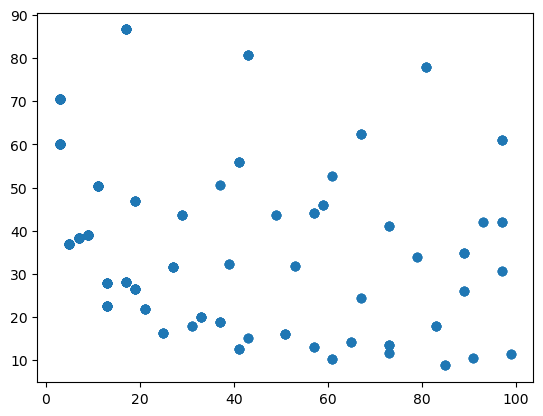

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df_gbcode["Sigma"], df_gbcode["Theta (deg)"])

In [9]:
from pyiron_workflow_atomistics.gb_optimiser import get_extended_structure_list

In [10]:
from pymatgen.io.ase import AseAtomsAdaptor
import pyiron_workflow as pwf
from pyiron_workflow import for_node
gb_ex1 = AseAtomsAdaptor().get_atoms(df_gbcode.reordered_structure.iloc[1].copy())
calc = TPCalculator("/cmmc/u/hmai/FePotentials/potential_files/GRACE/2025_04_28_Fe_FeC_C_pyxtal/final_model/")

wf_gb = Workflow("GB_props_ex1")
wf_gb.extended_structs = get_extended_structure_list(gb_ex1, 
                                                  extensions=np.arange(-0.7, 1.1, 0.1),
                                                  axis='c')
wf_gb.run()

{'extended_structs__atoms_list': [MSONAtoms(symbols='Fe144', pbc=True, cell=[3.99961876, 8.48447265, 47.295425179999995]),
  MSONAtoms(symbols='Fe144', pbc=True, cell=[3.99961876, 8.48447265, 47.39542518]),
  MSONAtoms(symbols='Fe144', pbc=True, cell=[3.99961876, 8.48447265, 47.49542518]),
  MSONAtoms(symbols='Fe144', pbc=True, cell=[3.99961876, 8.48447265, 47.59542518]),
  MSONAtoms(symbols='Fe144', pbc=True, cell=[3.99961876, 8.48447265, 47.69542518]),
  MSONAtoms(symbols='Fe144', pbc=True, cell=[3.99961876, 8.48447265, 47.795425179999995]),
  MSONAtoms(symbols='Fe144', pbc=True, cell=[3.99961876, 8.48447265, 47.89542518]),
  MSONAtoms(symbols='Fe144', pbc=True, cell=[3.99961876, 8.48447265, 47.99542518]),
  MSONAtoms(symbols='Fe144', pbc=True, cell=[3.99961876, 8.48447265, 48.09542518]),
  MSONAtoms(symbols='Fe144', pbc=True, cell=[3.99961876, 8.48447265, 48.19542518]),
  MSONAtoms(symbols='Fe144', pbc=True, cell=[3.99961876, 8.48447265, 48.295425179999995]),
  MSONAtoms(symbols='Fe

In [11]:
wf_gb.extended_structs.outputs.atoms_list

In [14]:
from pymatgen.io.ase import AseAtomsAdaptor
import pyiron_workflow as pwf
from pyiron_workflow import for_node
gb_ex1 = AseAtomsAdaptor().get_atoms(df_gbcode.reordered_structure.iloc[1].copy())
calc = TPCalculator("/cmmc/u/hmai/FePotentials/potential_files/GRACE/2025_04_28_Fe_FeC_C_pyxtal/final_model/")

wf_gb = Workflow("GB_props_ex1", delete_existing_savefiles=True)
wf_gb.extended_structs = get_extended_structure_list(gb_ex1, 
                                                  extensions=np.arange(-0.7, 1.1, 0.1),
                                                  axis='c')
@pwf.as_function_node
def calculate_structure_node(structure,
                   calc,
                   fmax: float = 0.01,
                   max_steps: int = 1000,
                   properties=('energy', 'forces', 'stresses')):
    from pyiron_workflow_atomistics.calculator import calc_structure
    atoms, results, converged = calc_structure(structure,
                   calc,
                   fmax,
                   max_steps,
                   properties)
    return atoms, results, converged
    
wf_gb.extended_results = for_node(
        calculate_structure_node,
        iter_on=("structure",),
        structure = wf_gb.extended_structs.outputs.atoms_list,
        calc=calc,
    )
wf_gb.run()

      Step     Time          Energy          fmax
BFGS:    0 19:39:50    -1173.502268       10.986638
BFGS:    1 19:39:50    -1178.178635        6.826975
BFGS:    2 19:39:51    -1179.929495        1.268470
BFGS:    3 19:39:51    -1180.325139        1.156275
BFGS:    4 19:39:51    -1181.239520        1.011732
BFGS:    5 19:39:55    -1181.450211        0.914711
BFGS:    6 19:39:55    -1181.746301        0.572244
BFGS:    7 19:39:56    -1181.935668        0.465302
BFGS:    8 19:39:56    -1182.060086        0.603431
BFGS:    9 19:40:00    -1182.161128        0.544340
BFGS:   10 19:40:00    -1182.249006        0.288151
BFGS:   11 19:40:01    -1182.310476        0.339678
BFGS:   12 19:40:01    -1182.379276        0.357594
BFGS:   13 19:40:01    -1182.440835        0.387597
BFGS:   14 19:40:02    -1182.492145        0.281782
BFGS:   15 19:40:02    -1182.538119        0.340127
BFGS:   16 19:40:03    -1182.581818        0.445692
BFGS:   17 19:40:03    -1182.624618        0.636532
BFGS:   18 19:

{'extended_results__df':                                             structure  \
 0   (Atom('Fe', [0.0, 0.0, -23.647712589999998], i...   
 1   (Atom('Fe', [0.0, 0.0, -23.69771259], index=0)...   
 2   (Atom('Fe', [0.0, 0.0, -23.74771259], index=0)...   
 3   (Atom('Fe', [0.0, 0.0, -23.79771259], index=0)...   
 4   (Atom('Fe', [0.0, 0.0, -23.84771259], index=0)...   
 5   (Atom('Fe', [0.0, 0.0, -23.897712589999998], i...   
 6   (Atom('Fe', [0.0, 0.0, -23.94771259], index=0)...   
 7   (Atom('Fe', [0.0, 0.0, -23.99771259], index=0)...   
 8   (Atom('Fe', [0.0, 0.0, -24.04771259], index=0)...   
 9   (Atom('Fe', [0.0, 0.0, -24.09771259], index=0)...   
 10  (Atom('Fe', [0.0, 0.0, -24.147712589999994], i...   
 11  (Atom('Fe', [0.0, 0.0, -24.197712589999995], i...   
 12  (Atom('Fe', [0.0, 0.0, -24.247712589999995], i...   
 13  (Atom('Fe', [0.0, 0.0, -24.297712589999996], i...   
 14  (Atom('Fe', [0.0, 0.0, -24.347712589999997], i...   
 15  (Atom('Fe', [0.0, 0.0, -24.397712589999998]

In [21]:
wf_gb.extended_results.outputs.df.value

,structure,atoms,results,converged
0,"(Atom('Fe', [0.0, 0.0, -23.647712589999998], i...","(Atom('Fe', [-2.9186616840132846e-16, 0.014781...","{'energy': -1183.0675549824948, 'forces': [[-5...",True
1,"(Atom('Fe', [0.0, 0.0, -23.69771259], index=0)...","(Atom('Fe', [-2.9165216576063504e-16, 0.014231...","{'energy': -1183.179072515305, 'forces': [[-1....",True
2,"(Atom('Fe', [0.0, 0.0, -23.74771259], index=0)...","(Atom('Fe', [-3.296548286307633e-16, 0.0118553...","{'energy': -1183.2765552733354, 'forces': [[1....",True
3,"(Atom('Fe', [0.0, 0.0, -23.79771259], index=0)...","(Atom('Fe', [-1.560638126921343e-16, 0.0098592...","{'energy': -1183.3606072969108, 'forces': [[-3...",True
4,"(Atom('Fe', [0.0, 0.0, -23.84771259], index=0)...","(Atom('Fe', [1.3697018924341205e-15, 0.0074405...","{'energy': -1183.4313997255547, 'forces': [[-9...",True
5,"(Atom('Fe', [0.0, 0.0, -23.897712589999998], i...","(Atom('Fe', [-8.160252241775672e-16, 0.0053294...","{'energy': -1183.4893145947592, 'forces': [[9....",True
6,"(Atom('Fe', [0.0, 0.0, -23.94771259], index=0)...","(Atom('Fe', [2.474354261315633e-16, 0.00284472...","{'energy': -1183.5345191985796, 'forces': [[-8...",True
7,"(Atom('Fe', [0.0, 0.0, -23.99771259], index=0)...","(Atom('Fe', [4.859415475441376e-16, 0.00060340...","{'energy': -1183.5673857538989, 'forces': [[1....",True
8,"(Atom('Fe', [0.0, 0.0, -24.04771259], index=0)...","(Atom('Fe', [1.2025846246287296e-15, -0.001978...","{'energy': -1183.5880727613792, 'forces': [[1....",True
9,"(Atom('Fe', [0.0, 0.0, -24.09771259], index=0)...","(Atom('Fe', [-3.9082922768095757e-16, -0.00463...","{'energy': -1183.5968856415147, 'forces': [[1....",True


In [11]:
df_gbcode

,Axis,Sigma,m,n,GB1,GB2,Theta (deg),Type,n_atoms,a,b,c,a_calc,structure,reordered_structure
0,"[1, 1, 0]",3,2,1,"(-4, -1, -3)","(-5, 0, 1)",70.528779,Mixed,1872,28.880847,8.496000,43.321270,57.761693,"[[13.31153588 4.24223633 41.59854962] Fe, [12...","[[ 0. 0. -28.84166107] Fe, ..."
1,"[1, 1, 0]",3,2,1,"(4, -1, 1)","(3, 0, -3)",70.528779,Mixed,144,24.030317,4.005053,8.496000,48.060634,"[[1.99980938 0. 1.41407878] Fe, [0. 0....","[[ 0. 0. -23.99771259] Fe, ..."
2,"[1, 1, 0]",3,2,1,"(0, 4, 1)","(2, 2, 3)",70.528779,Mixed,1224,23.353270,8.496000,35.029905,46.706541,"[[1.7148224 7.07039388 1.02889344] Fe, [4.458...","[[ 0. 0. -23.32158461] Fe, ..."
3,"[1, 1, 0]",3,2,1,"(0, 0, -3)","(-2, 2, -1)",70.528779,Tilt,144,16.992000,4.005053,12.015158,33.984000,"[[7.07039388 0. 1.99980938] Fe, [7.070...","[[ 0. 0. -16.9689453] Fe, [ ..."
4,"[1, 1, 0]",3,2,1,"(3, -2, 1)","(2, -1, -3)",70.528779,Mixed,336,21.192747,6.936955,12.977854,42.385495,"[[ 0.7558569 4.61836194 12.65166876] Fe, [3....","[[ 0. 0. -21.16399318] Fe, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,"[0, 0, 1]",89,13,3,"(-18, 11, 0)","(-21, 2, 0)",25.989234,Tilt,1780,119.482211,2.832000,59.741105,NaN,"[[59.19081254 1.41407878 1.94397912] Fe, [55...","[[ 0. 0. -59.66004888] Fe, ..."
89,"[0, 0, 1]",97,13,5,"(-13, 5, 0)","(-13, -5, 0)",42.075022,Symmetric Tilt,776,78.890391,2.832000,39.445196,NaN,"[[38.57947695 1.41407878 1.82744891] Fe, [34...","[[ 0. 0. -39.39167647] Fe, ..."
90,"[0, 0, 1]",97,13,5,"(-17, 14, 0)","(-22, -1, 0)",42.075022,Tilt,1940,124.736661,2.832000,62.368330,NaN,"[[62.09107922 1.41407878 1.9905103 ] Fe, [58...","[[ 0. 0. -62.28370925] Fe, ..."
91,"[0, 0, 1]",97,13,5,"(0, 0, 1)","(0, 0, 1)",42.075022,Twist,2328,5.664000,27.891965,27.891965,NaN,"[[ 1.41407878 27.13623182 1.8665133 ] Fe, [ 1...","[[ 0. 0. -16.9689453] Fe, [ 2..."
